In [38]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import MeanSquaredError

In [39]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Available devices:", tf.config.list_physical_devices())

Num GPUs Available:  1
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Data Preparation**

In [40]:
data = pd.read_csv('data/winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [41]:
data.shape

(1599, 12)

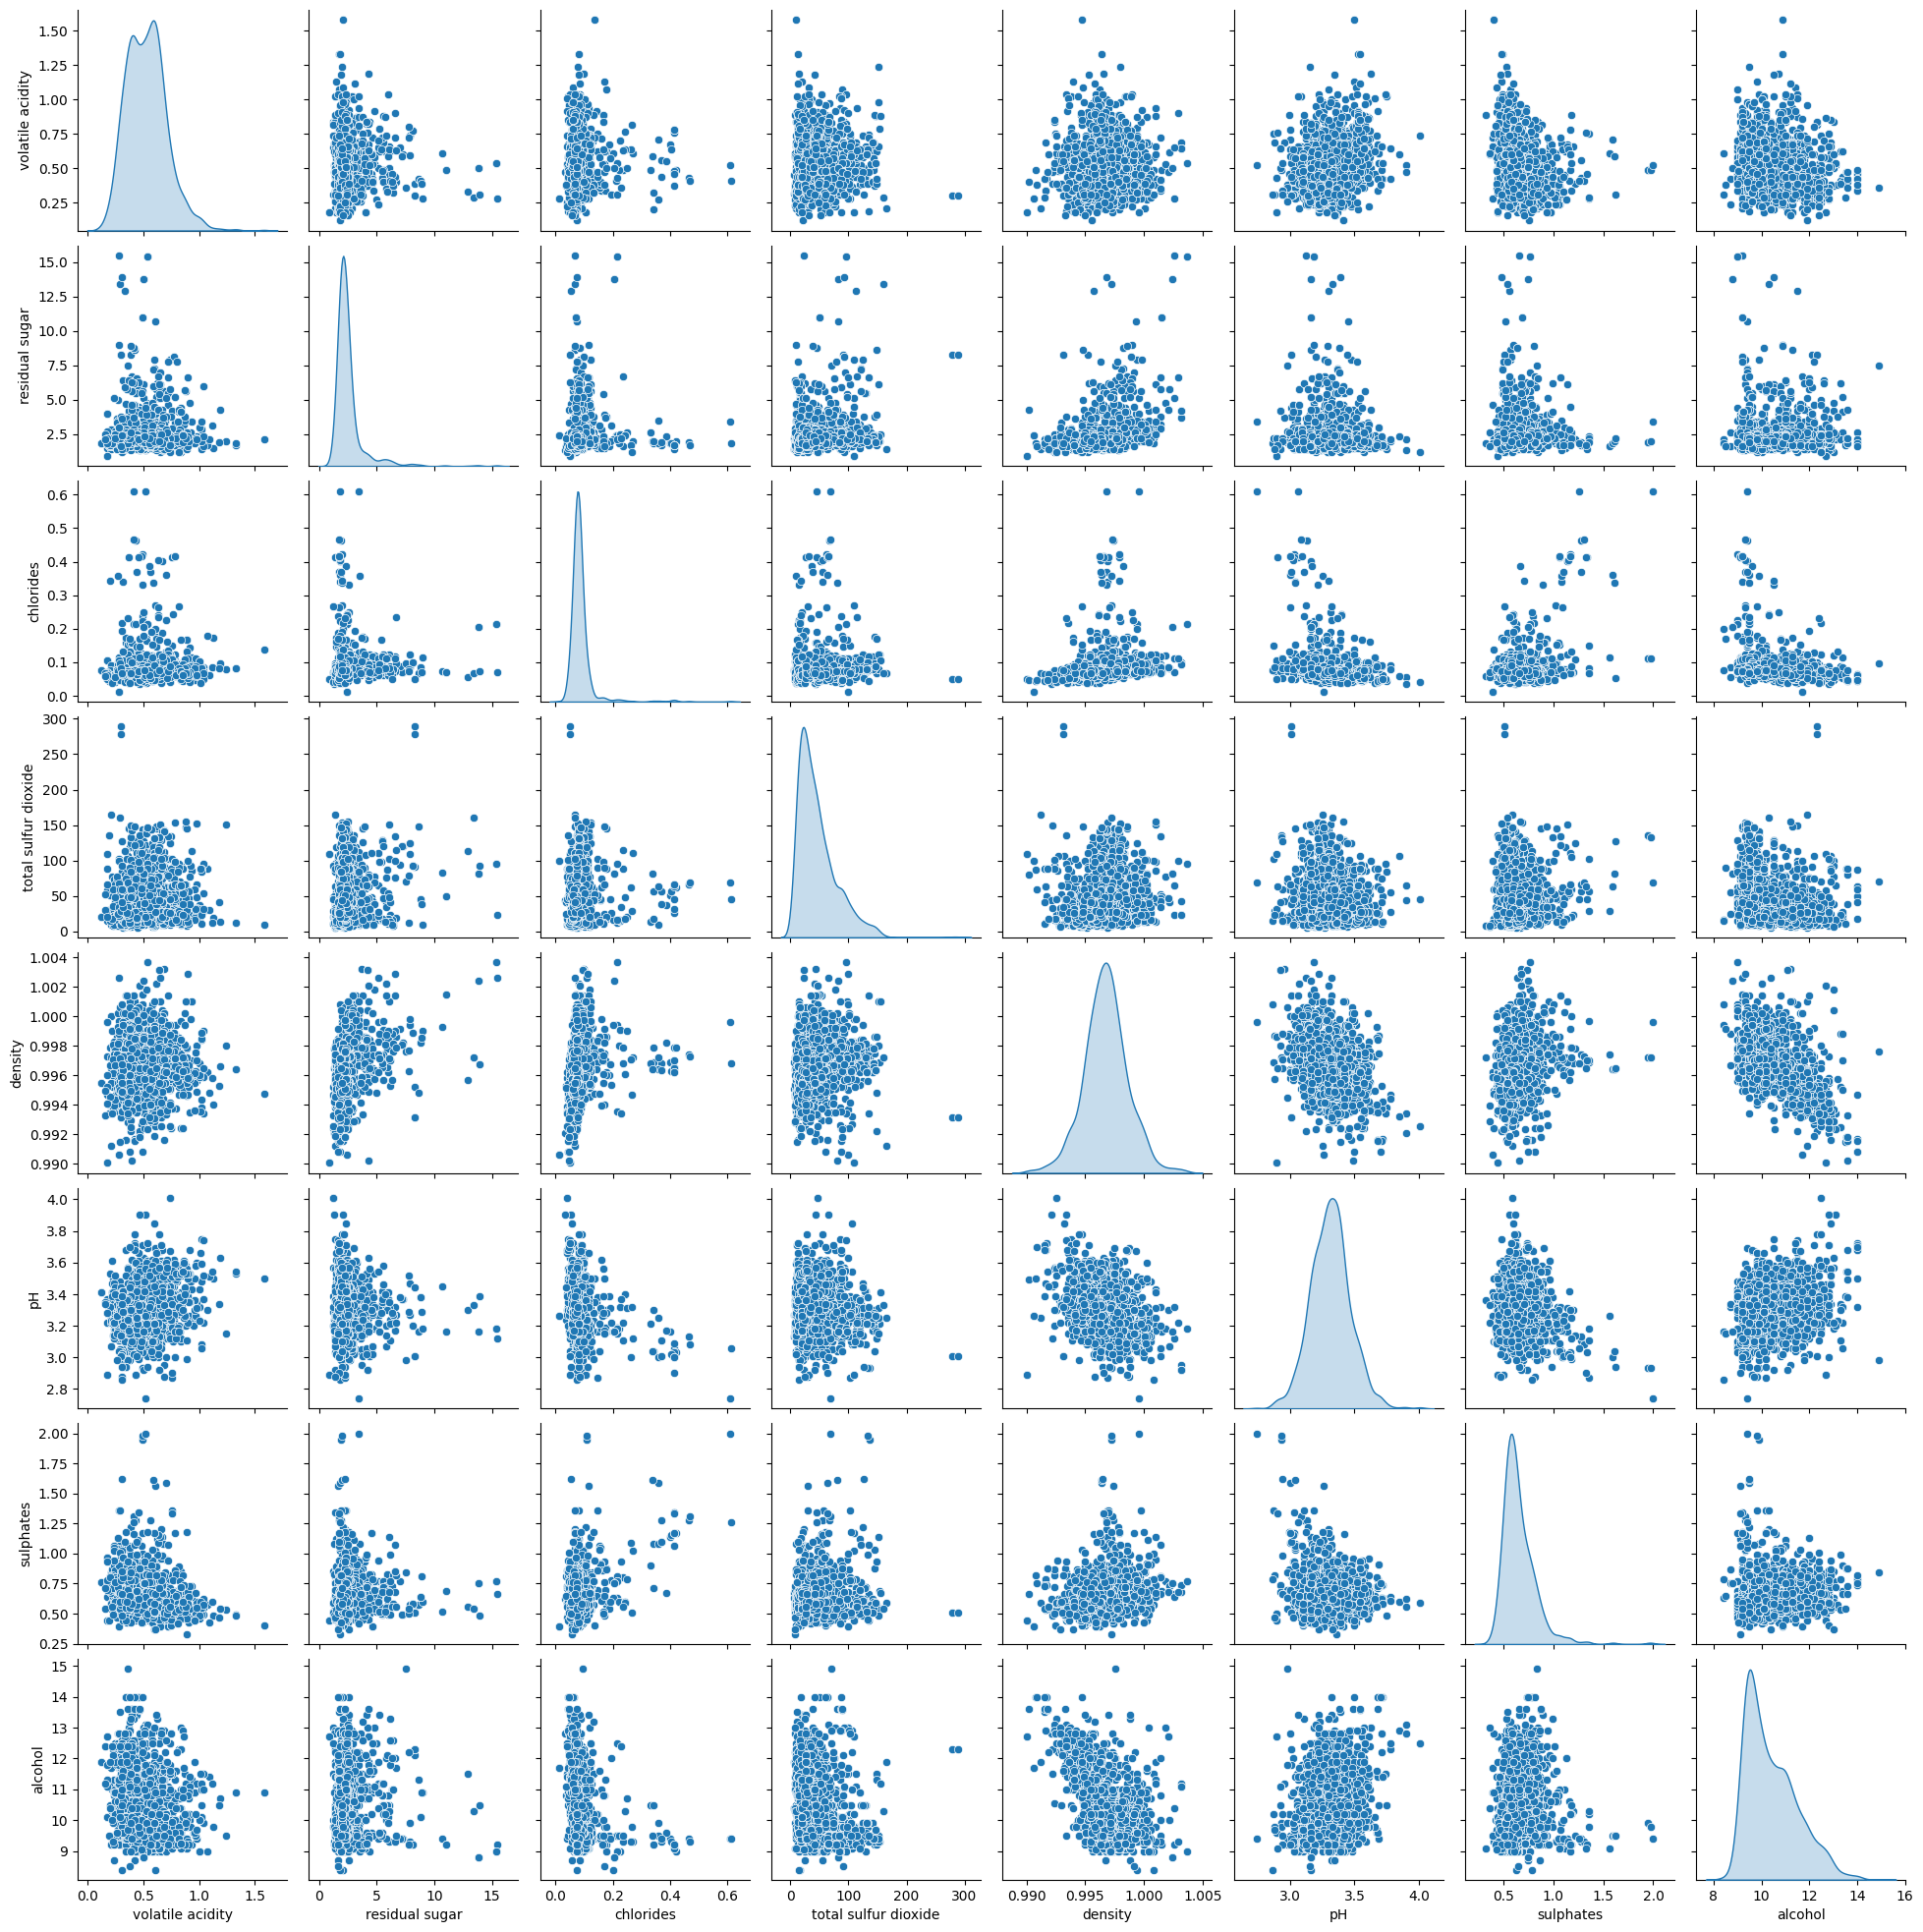

In [42]:
sns.pairplot(data[["volatile acidity", "residual sugar", "chlorides", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]], diag_kind="kde")

In [43]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)

In [44]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.8000e+00 5.3000e-01 3.3000e-01 2.4000e+00 8.0000e-02 2.4000e+01
  1.4400e+02 9.9655e-01 3.3000e+00 6.0000e-01 9.5000e+00 5.0000e+00]
 [7.5000e+00 7.7000e-01 2.0000e-01 8.1000e+00 9.8000e-02 3.0000e+01
  9.2000e+01 9.9892e-01 3.2000e+00 5.8000e-01 9.2000e+00 5.0000e+00]
 [7.5000e+00 3.8000e-01 5.7000e-01 2.3000e+00 1.0600e-01 5.0000e+00
  1.2000e+01 9.9605e-01 3.3600e+00 5.5000e-01 1.1400e+01 6.0000e+00]
 [6.7000e+00 4.6000e-01 2.4000e-01 1.7000e+00 7.7000e-02 1.8000e+01
  3.4000e+01 9.9480e-01 3.3900e+00 6.0000e-01 1.0600e+01 6.0000e+00]
 [7.0000e+00 6.0000e-01 1.2000e-01 2.2000e+00 8.3000e-02 1.3000e+01
  2.8000e+01 9.9660e-01 3.5200e+00 6.2000e-01 1.0200e+01 7.0000e+00]], shape=(5, 12), dtype=float32)


In [45]:
X, y = tf.gather(tensor_data, [1, 3, 4, 6, 7, 8, 9, 10], axis=1), tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)

In [46]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)

<tf.Tensor: shape=(1599, 8), dtype=float32, numpy=
array([[ 0.01217541, -0.09847936, -0.15869193, ..., -0.07200531,
        -0.34315467, -0.8663789 ],
       [ 1.3529298 ,  3.945545  ,  0.22387508, ..., -0.71993256,
        -0.46118107, -1.1479808 ],
       [-0.82579595, -0.16942725,  0.3939049 , ...,  0.31675106,
        -0.63822013,  0.91709846],
       ...,
       [-0.76993126, -0.02753164, -0.15869193, ..., -1.5622395 ,
         0.95513284, -0.11544073],
       [-0.21128345, -0.16942725, -0.07367702, ..., -0.91431075,
        -0.7562465 , -0.9602465 ],
       [-0.7140664 , -0.66606176, -0.45624402, ...,  0.1871656 ,
        -0.5792071 , -1.1479808 ]], dtype=float32)>

In [47]:
model = tf.keras.Sequential([
    Input(shape=(8,)),
    normalizer,
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])
model.summary()

# Sequential API
# Functional API
# Subclassing API

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (916.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 17 (72.00 B)

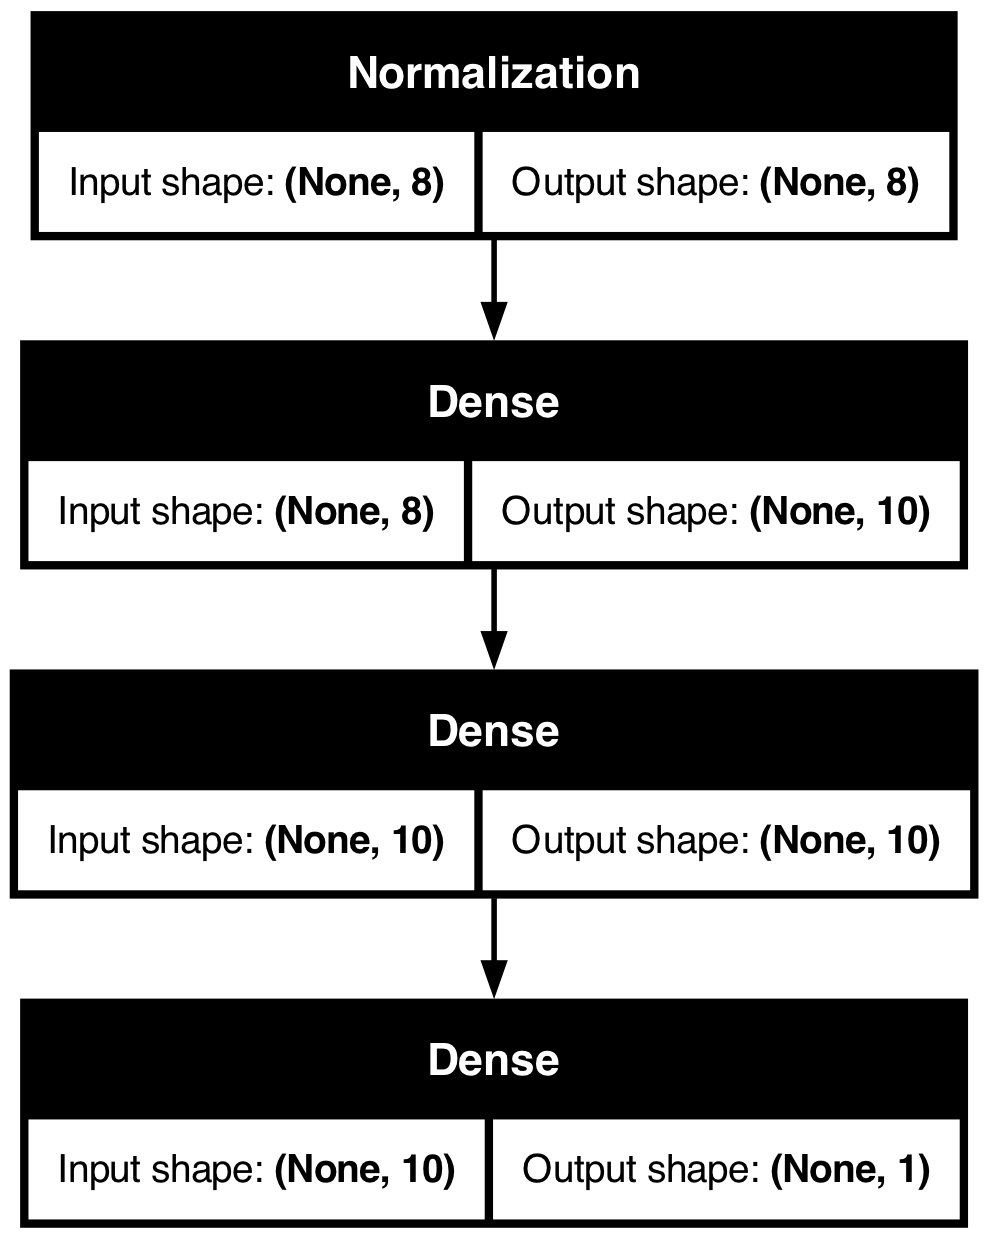

In [48]:
plot_model(model, to_file='wine-quality-red-model.png', show_shapes=True)

In [49]:
model.compile(loss=MeanSquaredError())